# Regression Analysis

# 1. Importing libraries and data

# 2. Data Cleaning

# 3. Data prep for regression analysis

# 4. Regression analysis

# 1. Importing libraries and data

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Creating path for importing data

path = r'C:\Users\srira\OneDrive\Documents\Project 6'

In [3]:
# Importing data jobs_salaries.csv

df_sal = pd.read_csv(os.path.join(path, 'Prepared Data', 'jobs_salaries.csv'))

# 2. Data Cleaning

In [4]:
# Checking the dataframe
df_sal.head()

,Unnamed: 0,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [5]:
# Renaming the abbreviations in the company_size column

com_size = {'S' : 'Small',
       'M' : 'Medium',
       'L' : 'Large'}

df_sal['company_size'] = df_sal['company_size'].replace(com_size)

In [6]:
df_sal.head()

,Unnamed: 0,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,Large
1,1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,Medium
2,2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,Medium
3,3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,Medium
4,4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,Medium


In [7]:
# Checking the total number of rows and columns
df_sal.shape

(9355, 13)

In [8]:
# Drop the columns that are unnecessary
df_sal = df_sal.drop(columns = ['Unnamed: 0'])

In [9]:
df_sal.columns

Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')

# 2. Data Cleaning

In [10]:
# Check for missing values
df_sal.isnull().sum()

work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

# There are no missing values.

In [11]:
# Check for duplicate values

dups = df_sal[df_sal.duplicated()]

In [12]:
dups

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
64,2023,Data Analyst,Data Analysis,USD,75000,75000,United States,Entry-level,Full-time,In-person,United States,Medium
111,2023,Research Scientist,Data Science and Research,USD,165000,165000,United States,Mid-level,Full-time,Remote,United States,Medium
112,2023,Research Scientist,Data Science and Research,USD,118800,118800,United States,Mid-level,Full-time,Remote,United States,Medium
115,2023,Data Engineer,Data Engineering,USD,184000,184000,United States,Mid-level,Full-time,In-person,United States,Medium
116,2023,Data Engineer,Data Engineering,USD,123000,123000,United States,Mid-level,Full-time,In-person,United States,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...
9079,2022,Data Scientist,Data Science and Research,USD,78000,78000,United States,Mid-level,Full-time,Remote,United States,Medium
9080,2022,Data Engineer,Data Engineering,USD,135000,135000,United States,Senior,Full-time,Remote,United States,Medium
9081,2022,Data Engineer,Data Engineering,USD,115000,115000,United States,Senior,Full-time,Remote,United States,Medium
9214,2021,Data Engineer,Data Engineering,USD,200000,200000,United States,Mid-level,Full-time,Remote,United States,Large


# The above cannot be considered as duplicates, as it applies to different employees in different years, and the values in the other columns also differs for each and every employee. Hence no steps were taken to address it and just left as it is.

C:\Users\srira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\srira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='salary_in_usd', ylabel='Count'>

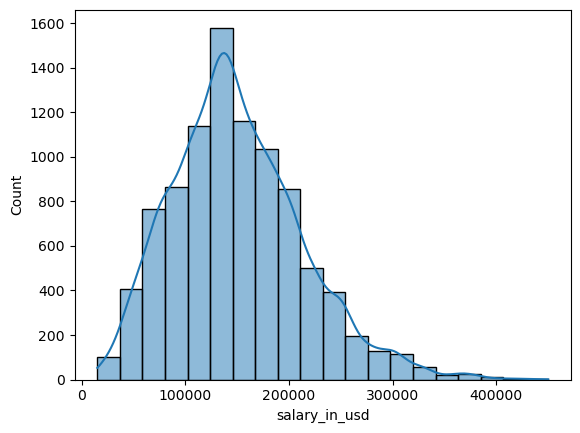

In [13]:
# Extreme values check for 'salary_in_usd'

sns.histplot(df_sal['salary_in_usd'], bins = 20, kde = True)

In [14]:
# Clean extreme values

df_sal = df_sal[df_sal['salary_in_usd'] < 400000] 

In [15]:
df_sal['salary_in_usd'].mean() # Check the mean

150067.31293463142

In [16]:
df_sal['salary_in_usd'].median() # Check the median

143000.0

In [17]:
df_sal['salary_in_usd'].max() # Check the mean

399880

# 3. Data prep for Regression Analysis

# Hypothesis : If the data professional is in a good position, better would be the salary of the data professional.

In [28]:
# Create subset with required variables

sub = df_sal[['job_title', 'company_location', 'employment_type', 'experience_level', 'salary_in_usd']]

In [29]:
# Converting categorical to numerical values by using LabelEncoder

from sklearn.preprocessing import LabelEncoder
len = LabelEncoder()


In [30]:
# Converting job_title to numerical

sub['job_title'] = len.fit_transform(sub['job_title'])
sub['job_title'].unique()

C:\Users\srira\AppData\Local\Temp\ipykernel_8992\2479840406.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['job_title'] = len.fit_transform(sub['job_title'])


array([ 42,  41,  69, 102,  44,  96,  35,   7,  12,  18,  25, 119, 117,
       118,  64,  60,  58, 103,   2,  94,  78,  52,  59,  62,  22,   1,
        51,  93,  63,  85,  15,  49,  99,  71,  16,  46,  26,  47,  67,
        24,   4,  48,  50,   0,  66,  72,  27,  97,  61,  80,  21,  77,
        84,  73,  32,  76,  88,  75,  81,  39,  14,  43, 114,  65, 122,
        45, 104, 100,   5,  87,   9,   3,  54,  11,  38,  55,  98,  91,
       115, 113, 111,  86, 124, 123,  34, 105,  23,  56,  92, 107,  53,
        83, 121, 101,  31,  57,  29,   8, 110,   6, 116,  95,  74,  13,
       120,  10,  82,  20,  89,  17,  30,  79,  40,  19,  33, 109, 106,
        36,  68,  70, 108,  37,  28,  90, 112])

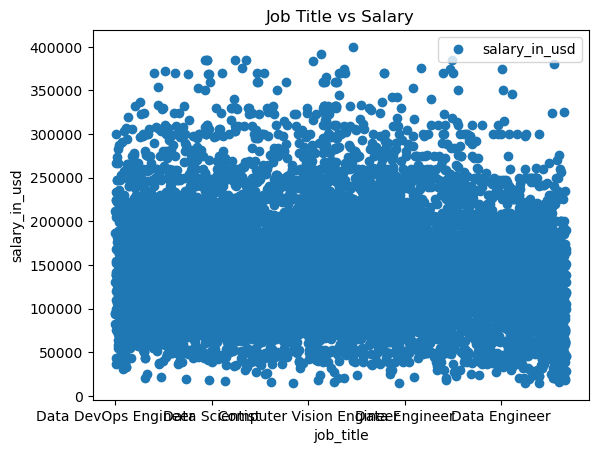

In [31]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_sal.plot(x = 'job_title', y='salary_in_usd',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Job Title vs Salary')  
plt.xlabel('job_title')  
plt.ylabel('salary_in_usd')  
plt.show()

In [32]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = sub['job_title'].values.reshape(-1,1)
y = sub['salary_in_usd'].values.reshape(-1,1)

In [35]:
X

array([[ 42],
       [ 41],
       [ 41],
       ...,
       [114],
       [ 69],
       [ 21]])

In [36]:
y

array([[ 95012],
       [186000],
       [ 81800],
       ...,
       [151000],
       [105000],
       [100000]], dtype=int64)

In [37]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 4. Regression Analysis

In [38]:
# Create a regression object.

regression = LinearRegression() 

In [39]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [40]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

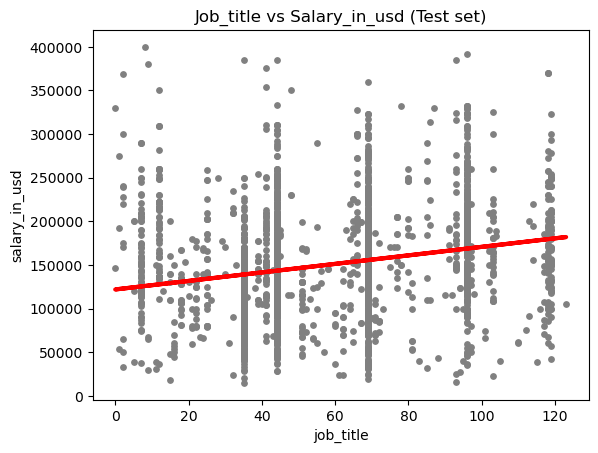

In [41]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Job_title vs Salary_in_usd (Test set)')
plot_test.xlabel('job_title')
plot_test.ylabel('salary_in_usd')
plot_test.show()

In [42]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # Mean squared error
r2 = r2_score(y_test, y_predicted) # The R2 score. 

In [43]:
# Print the model summary statistics. Evaluating the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[488.18127113]]
Mean squared error:  3779605293.275822
R2 score:  0.042847824797672684


# The values of mse is very large and R2 score is very small, thereby indicating a poor fit  and also the regression line is not an accurate representation.

In [44]:
y_predicted

array([[138984.5711024 ],
       [143378.20254256],
       [155582.73432078],
       ...,
       [143378.20254256],
       [143378.20254256],
       [138984.5711024 ]])

In [45]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,169000,138984.571102
1,121000,143378.202543
2,158400,155582.734321
3,62500,156559.096863
4,127300,155582.734321
5,105000,143378.202543
6,135000,143378.202543
7,92280,138984.571102
8,250000,155582.734321
9,51081,155582.734321


# There is a verg big difference between the actual and the predicted values, hence this model is not very good in predicting the relationship between the salary and job_title variables.

# Compare how the regression fits the training set

In [59]:
# Predict.

y_predicted_train = regression.predict(X_train) # Predicting X-train

In [60]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [61]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[23867.93635721]]
Mean squared error:  2134368396919.172
R2 score:  -543.0187000343351


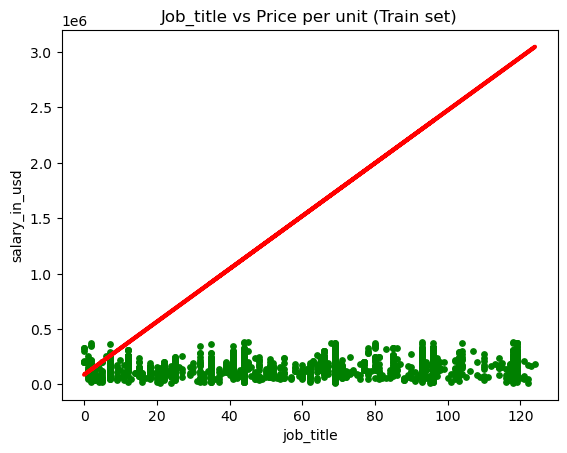

In [62]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Job_title vs Price per unit (Train set)')
plot_test.xlabel('job_title')
plot_test.ylabel('salary_in_usd')
plot_test.show()

# When doing the same with the training set, the MSE value is way too large and the R2 score has gone in negative, which clearly indicates that the relationship between the job_title and the salary variables in not linear. 

# Eventhough the salary would vary depending on the job_title, it is not the only one that is to be considered. Other variables such as the experience level, employment type and the company location would also have to be taken into account in order to determine the salary structures of different roles in the data science field.